Mediation Analysis Results for Mediator: consumer_behavior
Total Effect (c): 0.5000
Direct Effect (c'): 0.3712
Indirect Effect (a*b): 0.1288
Mediation Analysis Results for Mediator: logistics_efficiency
Total Effect (c): 0.5000
Direct Effect (c'): 0.4681
Indirect Effect (a*b): 0.0320


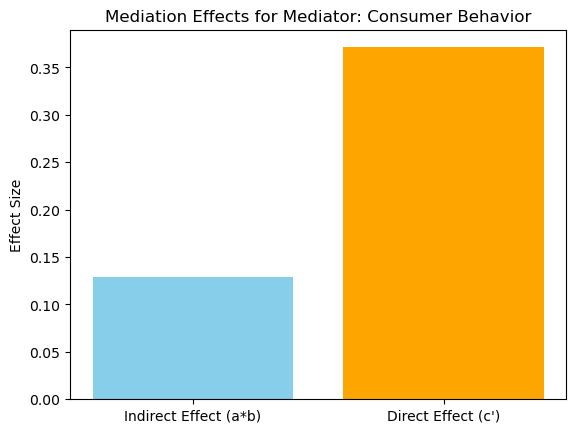

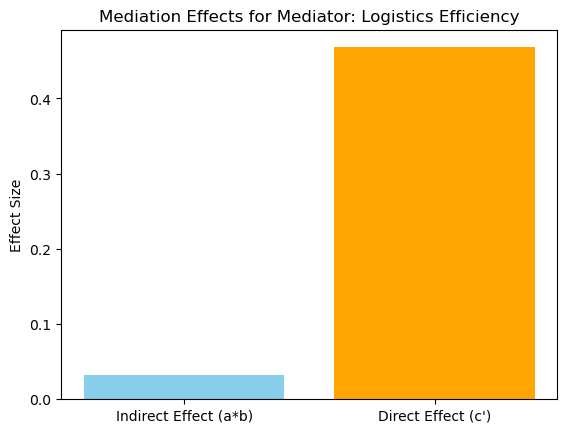

In [4]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

def mediation_analysis(data, x_var, m_var, y_var):
    """
    进行单一中介效应分析，并返回结果。
    
    Parameters:
        data: pd.DataFrame - 数据集
        x_var: str - 自变量名
        m_var: str - 中介变量名
        y_var: str - 因变量名
        
    Returns:
        dict - 包含分析结果的字典
    """
    try:
        # 自变量 (X), 中介变量 (M), 因变量 (Y)
        X = sm.add_constant(data[x_var])  # 添加常数项
        M = data[m_var]
        Y = data[y_var]
        
        # 步骤1: X 对 Y 的总效应 (c路径)
        model_total = sm.OLS(Y, X).fit()
        total_effect = model_total.params[x_var]
        
        # 步骤2: X 对 M 的效应 (a路径)
        model_a = sm.OLS(M, X).fit()
        a_effect = model_a.params[x_var]
        
        # 步骤3: M 和 X 对 Y 的效应 (b和c'路径)
        XM = sm.add_constant(data[[x_var, m_var]])
        model_b_c_prime = sm.OLS(Y, XM).fit()
        b_effect = model_b_c_prime.params[m_var]
        c_prime_effect = model_b_c_prime.params[x_var]
        
        # 计算间接效应 (a*b) 和总间接效应 (c = c' + a*b)
        indirect_effect = a_effect * b_effect
        direct_effect = c_prime_effect
        total_effect = indirect_effect + direct_effect
        
        # 输出结果
        results = {
            "a_effect": a_effect,
            "b_effect": b_effect,
            "c_prime_effect": c_prime_effect,
            "indirect_effect": indirect_effect,
            "total_effect": total_effect,
            "summary_total": model_total.summary(),
            "summary_a": model_a.summary(),
            "summary_b_c_prime": model_b_c_prime.summary()
        }
        
        print(f"Mediation Analysis Results for Mediator: {m_var}")
        print(f"Total Effect (c): {total_effect:.4f}")
        print(f"Direct Effect (c'): {direct_effect:.4f}")
        print(f"Indirect Effect (a*b): {indirect_effect:.4f}")
        
        return results
    
    except Exception as e:
        print(f"Error in mediation analysis: {e}")
        return None


def plot_effects(results, mediator_name):
    """
    可视化中介效应的直接效应和间接效应。
    
    Parameters:
        results: dict - 中介效应分析结果
        mediator_name: str - 中介变量名称
    """
    try:
        effects = ["Indirect Effect (a*b)", "Direct Effect (c')"]
        values = [results["indirect_effect"], results["c_prime_effect"]]
        
        # 绘制柱状图
        plt.bar(effects, values, color=['skyblue', 'orange'])
        plt.title(f"Mediation Effects for Mediator: {mediator_name}")
        plt.ylabel("Effect Size")
        plt.show()
    
    except Exception as e:
        print(f"Error in plotting effects: {e}")


# 加载数据
data = pd.read_csv("data123.csv", encoding="gbk")
data = data.dropna()  # 删除缺失值

# 分析消费者行为作为中介变量
results1 = mediation_analysis(data, 'ecommerce_dev', 'consumer_behavior', 'retail_sales')

# 分析物流效率作为中介变量
results2 = mediation_analysis(data, 'ecommerce_dev', 'logistics_efficiency', 'retail_sales')

# 可视化结果
if results1:
    plot_effects(results1, 'Consumer Behavior')

if results2:
    plot_effects(results2, 'Logistics Efficiency')